# Principal Component Analysis

## Introduction

In this exercise, you will use principal component analysis to find a low-dimensional representation of face images. This exercise has been adapted from the course Machine Learning from Andrew Ng.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation.

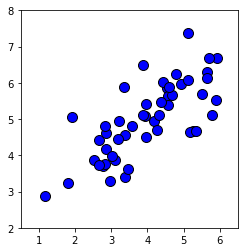

In [ ]:
import urllib
from pathlib import Path

url = 'https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/raw/master/Data/data1.csv'
dfile = Path('data1.csv')
if not dfile.is_file():
  urllib.request.urlretrieve(url, dfile) 

# Load the dataset into the variable X 
X = np.loadtxt(dfile, delimiter=',')

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

### Implementing PCA ( 2pts)

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: 

1. Compute the covariance matrix of the data.
2. Use SVD (in python we use numpy's implementation `np.linalg.svd`) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.

In [ ]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component.
    """

    
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)
    
    ### BEGIN SOLUTION    
    
    ### END SOLUTION
    
    return U, S

Once you have completed the function `pca`, the following cell will run PCA on the normalized example dataset and plot the corresponding principal components found similar to the figure below. 

![](https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Figures/pca_components.png?raw=true)

The following cell will also output the top principal component (eigenvector) found, and you should expect to see an output of about `[-0.707 -0.707]`. (It is possible that `numpy` may instead output the negative of this, since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


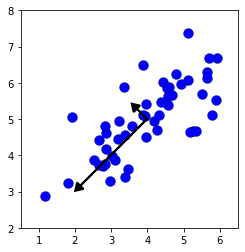

In [ ]:
#  Before running PCA, it is important to first normalize X
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

mu = scaler.mean_
sigma = scaler.scale_https://colab.research.google.com/drive/1MdA_YEzMd2MxZfPsaLzfahT4E-TN1pSk
X_norm = scaler.transform(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')
### BEGIN HIDDEN TESTS
assert -0.707106 >= U[0,0] >= -0.707107
assert -0.707106 >= U[1,0] >= -0.707107
### END HIDDEN TESTS

### Dimensionality Reduction with PCA (2 pts)

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

In [ ]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    ### BEGIN SOLUTION

    ### END SOLUTION
    
    return Z

The following cell will project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

In [ ]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.496313)')
### BEGIN HIDDEN TESTS
assert 1.496312 <= abs(Z[0,0]) <= 1.496314
### END HIDDEN TESTS

Projection of the first example: 1.496313
(this value should be about    : 1.496313)


#### Reconstructing an approximation of the data (2 pts)

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function `recoverData` to project each example in `Z` back onto the original space and return the recovered approximation in `Xrec`.

In [ ]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    ### BEGIN SOLUTION


    ### END SOLUTION
    
    return X_rec

Once you have completed the code in `recoverData`, the following cell will recover an approximation of the first example and you should see a value of about `[-1.058 -1.058]`. The code will then plot the data in this reduced dimension space. This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it. An example of what you should get for PCA projection is shown in this figure: 

![](https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Figures/pca_reconstruction.png?raw=true)

In the figure above, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$. The dotted lines show the distance from the data points in original space to the projected space. Those dotted lines represent the error measure due to PCA projection.

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.058053 -1.058053])


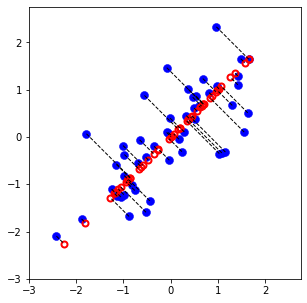

In [ ]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.058053 -1.058053])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)
### BEGIN HIDDEN TESTS
assert X_rec[0, 0] <= -1.058052
assert X_rec[0, 1] <= -1.058052
assert X_rec[0, 0] >= -1.058053
assert X_rec[0, 1] >= -1.058053
### END HIDDEN TESTS

### Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex7faces.mat` contains a dataset `X` of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset. Each row of `X` corresponds to one face image (a row vector of length 1024). 

In order to visualize the faces, we define a helper function in the next cell.

In [ ]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    m, n = X.shape
    
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = ax_array.ravel()
    
    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

The next cell will load and visualize the first 100 of these face images similar to what is shown in this figure:

![Faces](https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Figures/faces.png?raw=true)

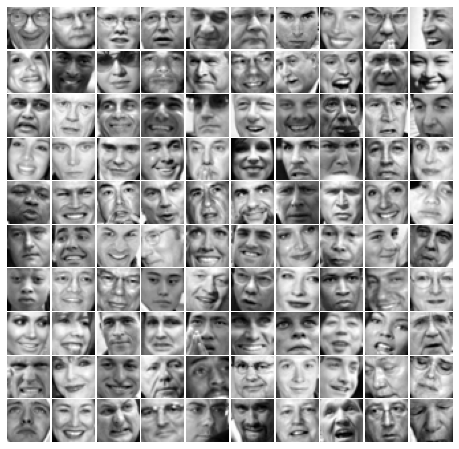

In [ ]:
url = 'https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Data/faces.gz?raw=true'
dfile = Path('faces.gz')
if not dfile.is_file():
  urllib.request.urlretrieve(url, dfile)

#  Load Face dataset
X = np.loadtxt(dfile, delimiter=',')

#  Display the first 100 faces in the dataset
displayData(X[:100, :], figsize=(8, 8))

#### PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. 

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

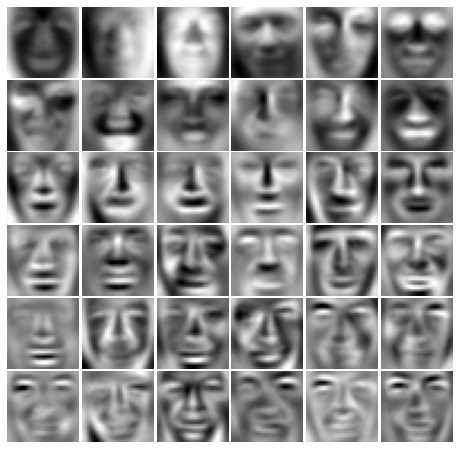

In [ ]:
#  normalize X by subtracting the mean value from each feature
scaler = preprocessing.StandardScaler().fit(X)

mu = scaler.mean_
sigma = scaler.scale_
X_norm = scaler.transform(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, :36].T, figsize=(8, 8))

#### Dimensionality Reduction

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [ ]:
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


In the next cell, an approximate recovery of the data is performed and the original and projected face images
are displayed similar to what is shown here:

<table>
    <tr>
        <td><img src="https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Figures/faces_original.png?raw=true" width="300"></td>
        <td><img src="https://github.com/UPY-UL/U2-M2-L1-dim_red_PCA/blob/master/Figures/faces_reconstructed.png?raw=true" width="300"></td>
    </tr>
</table>

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

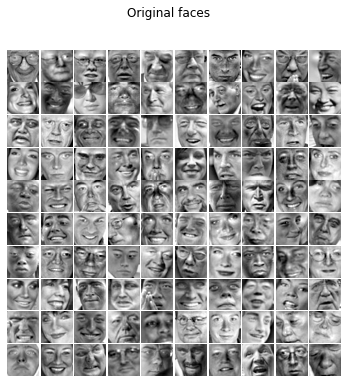

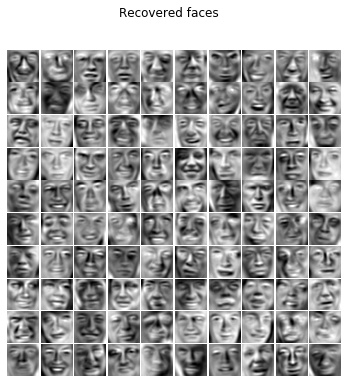

In [ ]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
displayData(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces');